In [1]:
import iris
import datetime as dt
import time
import numpy as np
import bz2

In [2]:
filename = 'SWDIFDS_RAD.2D.201509'
cubes = iris.load_cube('./raw_data/grib/SWDIFDS_RAD.2D.201509.grb')

In [3]:
print(cubes)

UNKNOWN LOCAL PARAM 23.201 / (unknown) (time: 720; grid_latitude: 824; grid_longitude: 848)
     Dimension coordinates:
          time                              x                   -                    -
          grid_latitude                     -                   x                    -
          grid_longitude                    -                   -                    x
     Scalar coordinates:
          forecast_period: 0 hours
          originating_centre: unknown centre edzw


In [38]:
testcube = cubes[-1]

In [39]:
testcube.coords('time')

[DimCoord(array([ 401016.]), standard_name='time', units=Unit('hours since 1970-01-01 00:00:00', calendar='gregorian'))]

In [40]:
print(testcube.coords('time')[0].cell(0).point)

401016.0


In [42]:
401016.0 * 3600

1443657600.0

In [50]:
timestring = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(testcube.coords('time')[0].cell(0).point.round()*3600))

In [51]:
timestring

'2015-10-01 00:00:00'

/home/fritz/opt/anaconda3/envs/iris_grib/lib/python2.7/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/fritz/opt/anaconda3/envs/iris_grib/lib/python2.7/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


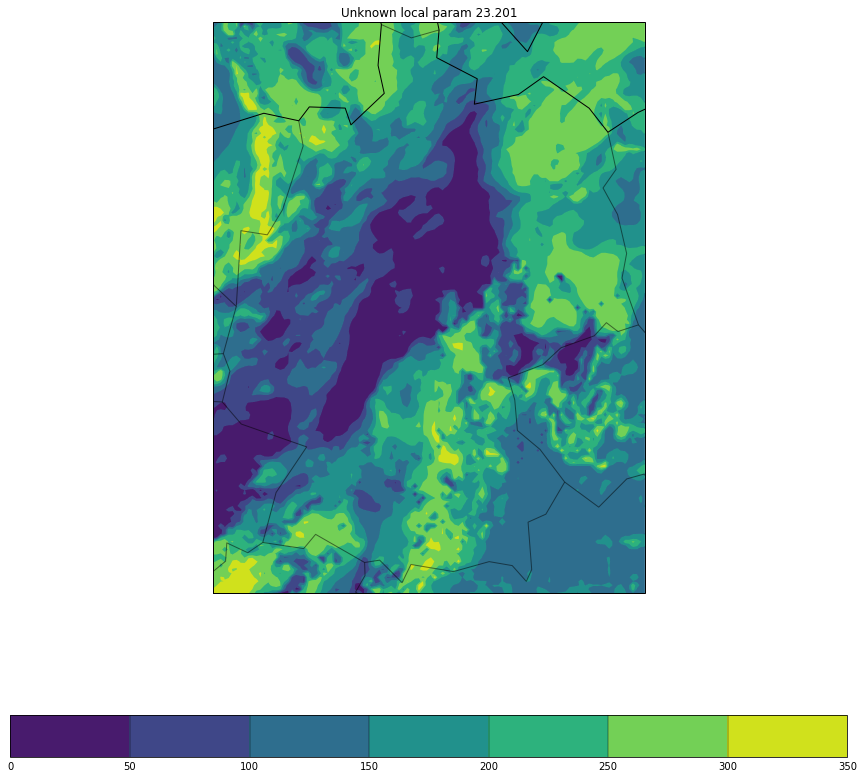

In [6]:
from __future__ import (absolute_import, division, print_function)
from six.moves import (filter, input, map, range, zip)  # noqa

import matplotlib.pyplot as plt

import iris
import iris.quickplot as qplt
import cartopy.feature as feature
f, ax = plt.subplots(figsize=(15,15))
# Draw the contour with 25 levels.
ax = qplt.contourf(cubes[12][365:510, 375:485])

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().add_feature(feature.BORDERS, linestyle='-', alpha=.5)
# plt.gca().add_feature(feature.LAND)
plt.show()

In [52]:
cubes[12].data[365:510, 375:485].shape

(145, 110)

In [3]:
import wget
import os
import bz2

In [4]:
variables = ['SWDIFDS_RAD', 'SWDIRS_RAD', 'V_10M', 'U_10M', 'TOT_PRECIP', 'T_2M']

ll_lat = 365
ur_lat = 510
ll_lon = 375
ur_lon = 485

raw_out = './raw_data/grib/'

rad_max = 0


In [5]:
base_path = 'ftp://ftp-cdc.dwd.de/pub/REA/COSMO_REA6/hourly/2D/'
for var in variables:
    for month in range(12, 13, 1):
        
        arr = []
        
        if month >= 10:
            month_string = str(month)
        else:
            month_string = '0' + str(month)
            
        time_index = open('./processed_data/weather/{}.2D.2015{}.txt'.format(var, month_string), 'a')
        path = base_path + var + '/' + '{}.2D.2015{}.grb.bz2'.format(var, month_string)
        
        print(path)
        
        _ = wget.download(path, out=raw_out)
        
        filename = raw_out + '{}.2D.2015{}.grb.bz2'.format(var, month_string)
        
        print('download finished')
        
        zipfile = bz2.BZ2File(filename) # open the file
        data = zipfile.read() # get the decompressed data
        newfilepath = filename[:-4] # new file name
        
        with open(newfilepath, 'wb') as f:
            f.write(data)
        
        print('unzip finished')
        
        cubes = iris.load_cube(newfilepath)
        
        for i in range(cubes.shape[0]):
            print('cube {}'.format(i))
            timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(cubes[i].coords('time')[0].cell(0).point.round()*3600))
            data = cubes[i].data[ll_lat:ur_lat, ll_lon:ur_lon]
#             print(data)
            arr.append(data)
            time_index.write(timestamp + '\n')
            max_value = np.amax(data)
            if max_value > rad_max:
                rad_max = max_value
        
        print('data extracted')
        
        del(cubes)
    
        time_index.close()
        arr = np.array(arr)
        np.save('./processed_data/weather/{}.2D.2015{}.npy'.format(var, month_string), arr)
        
        os.remove(filename)
        os.remove(newfilepath)
        
# 'SWDIRS_RAD/SWDIRS_RAD.2D.201506.grb.bz2''

# ftp://ftp-cdc.dwd.de/pub/REA/COSMO_REA6/hourly/2D/SWDIRS_RAD/SWDIRS_RAD.2D.201508.grb.bz2

ftp://ftp-cdc.dwd.de/pub/REA/COSMO_REA6/hourly/2D/SWDIFDS_RAD/SWDIFDS_RAD.2D.201512.grb.bz2
download finished
unzip finished
cube 0
cube 1
cube 2
cube 3
cube 4
cube 5
cube 6
cube 7
cube 8
cube 9
cube 10
cube 11
cube 12
cube 13
cube 14
cube 15
cube 16
cube 17
cube 18
cube 19
cube 20
cube 21
cube 22
cube 23
cube 24
cube 25
cube 26
cube 27
cube 28
cube 29
cube 30
cube 31
cube 32
cube 33
data extracted


In [7]:
np.load('./processed_data/weather/{}.2D.2015{}.npy'.format(var, month_string)).shape

(34, 145, 110)